# Predicting the purchase Amount for the different category

In [92]:
# import pandas as pd
import pandas as pd
import numpy as np

In [93]:
# importing the train data set 
df_train = pd.read_csv('train_blackfriday.csv')

df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [94]:
df_train[df_train['Product_ID'] == 'P00248942']['Product_Category_2']

1         6.0
126       6.0
405       6.0
516       6.0
701       6.0
         ... 
542905    6.0
544481    6.0
545091    6.0
545123    6.0
545583    6.0
Name: Product_Category_2, Length: 581, dtype: float64

In [95]:
df_train.shape

(550068, 12)

In [96]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [97]:
# we can see that product 2 and product 3 is

In [98]:
# importing the test data set 
df_test = pd.read_csv('test_blackfriday.csv')

df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [99]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

Basic understanding with the Data Set

Mens will buy more. they will be in the range of 26-35.

Martial status -1 (Married will buy more)

Product 1,2,3 - Has missed values. Thought that there is no item bought of such category.


In [100]:
df_test.shape

(233599, 11)

In [101]:
import warnings

warnings.filterwarnings('ignore')

In [102]:
# combining the Dataframe for the simplification and to avoid duplication of the same process

df = pd.concat([df_train,df_test],axis=0, sort = False)

In [103]:
df.shape

(783667, 12)

In [104]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

### we can see lot of the values are missing. we will impute by using further Analysis

In [105]:
# checking that concatination happened correctly or not

In [106]:
# train data
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [107]:
# test data
df[550068:].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN


In [108]:
# filling the product category2 and 3 with 0.

df.Product_Category_2.fillna(0,inplace=True)
df.Product_Category_3.fillna(0,inplace=True)

In [109]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

We are not modifying the purchase. Because we already know that theay are coming from the test data set.

In [110]:
# checking the user id
df.User_ID.value_counts()

1001680    1468
1004277    1384
1001941    1286
1001181    1230
1000889    1204
           ... 
1000708      13
1005117      13
1000341      13
1002037      13
1005804      13
Name: User_ID, Length: 5891, dtype: int64

The length that of 5891 unique users are buying the products

In [111]:
# checking the Gender counts
df.Gender.value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

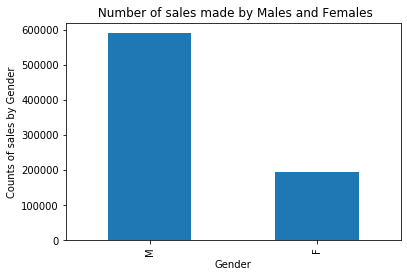

In [112]:
#importing the Matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

#
df.Gender.value_counts().plot(kind = 'bar')
plt.xlabel('Gender')
plt.ylabel('Counts of sales by Gender')
plt.title(' Number of sales made by Males and Females')
plt.show()

### Males are making more sales. if company targets males they can incearse profits.

In [113]:
df.Age.value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

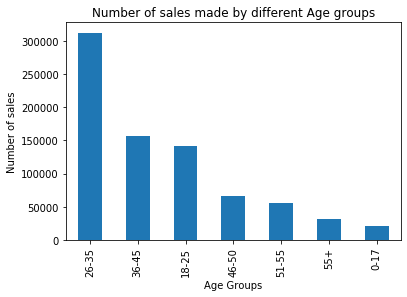

In [114]:
df.Age.value_counts().plot(kind = 'bar')
plt.title('Number of sales made by different Age groups')
plt.xlabel('Age Groups')
plt.ylabel('Number of sales')
plt.show()

26-35 is the age group making the more sales.
The sales are decreasing with the increase in age.

But the people age less to teens are making less sales.That statement already knew.

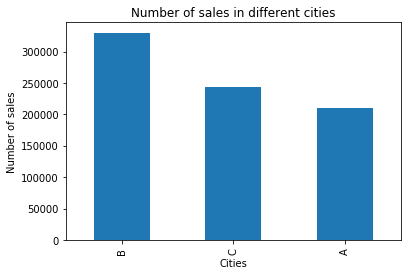

In [115]:
df.City_Category.value_counts().plot(kind = 'bar')
plt.title('Number of sales in different cities')
plt.xlabel('Cities')
plt.ylabel('Number of sales')
plt.show()

B - City has more sales

In [116]:
# checking the information staying years

df.Stay_In_Current_City_Years.value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

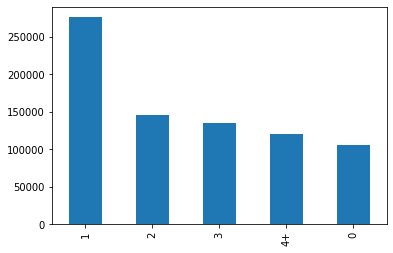

In [117]:
df.Stay_In_Current_City_Years.value_counts().plot(kind = 'bar')

### We can belive that the product sales has been decreasing with the increasing in stay by excluding 0th Year.

### My assumption is at the start there is less known about product or store " there is less sales". 

### The increase sales started growth in the first year  as they know about the product 

### After usage, products are not good . That might be the reason it show decline


In [118]:
# checking the information about the occupation

df.Occupation.value_counts()

4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64

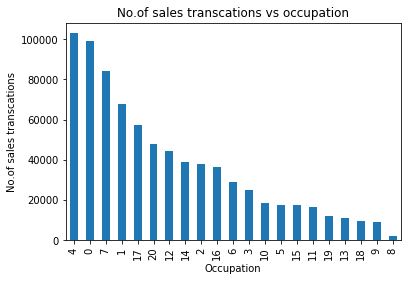

In [119]:
df.Occupation.value_counts().plot(kind = 'bar')
plt.xlabel('Occupation')
plt.ylabel('No.of sales transcations')
plt.title('No.of sales transcations vs occupation')
plt.show()

Occupation 4 is buying more number of times and Occupation 8 is buying less.

In [120]:
# checking the Number of sales done by married and unmarried

df.Marital_Status.value_counts()

0    462538
1    321129
Name: Marital_Status, dtype: int64

There is no information about the what Zero and one. Assuming '0' is married and '1' is unmarried.

The reason is married persons will make more sales

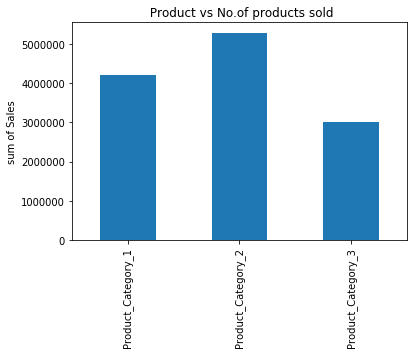

In [121]:
# seeing the sum of sales for the product category

df[['Product_Category_1','Product_Category_2','Product_Category_3']].sum().plot(kind = 'bar')
plt.title(' Product vs No.of products sold')
plt.ylabel('sum of Sales')
plt.show()

'Product Category 2' has more sales

In [122]:
# checking on the Product ID counts
df.Product_ID.value_counts()

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00294942       1
P00299742       1
P00340742       1
P00126342       1
P00068342       1
Name: Product_ID, Length: 3677, dtype: int64

### There are 3677 Different product IDS

In [123]:
# Checking the relationship between the Gender  and Purachse

df[['Gender','Purchase']][0:550068].groupby('Gender').mean()

,Purchase
Gender,
F,8734.565765
M,9437.526040


### We found already earlier found that Men making more  sales. 
### Now found that Mean sales amount is also higher in the males

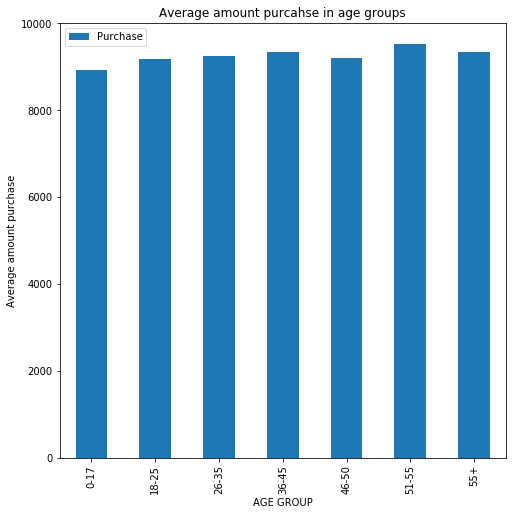

In [124]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,8

# checking the mean amount purchase by different age groups
df[['Age','Purchase']][0:550068].groupby('Age').mean().plot(kind ='bar')
plt.title('Average amount purcahse in age groups')
plt.xlabel('AGE GROUP')
plt.ylabel('Average amount purchase')
plt.show()


The mean amout spending by the all age groups is almost same.

But the Amount spending will be higher in the age group of 26-35 as the making more number of sales

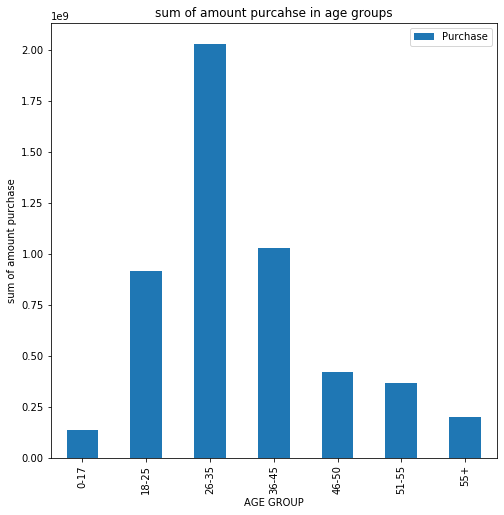

In [125]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,8

# checking the mean amount purchase by different age groups
df[['Age','Purchase']][0:550068].groupby('Age').sum().plot(kind ='bar')
plt.title('sum of amount purcahse in age groups')
plt.xlabel('AGE GROUP')
plt.ylabel('sum of amount purchase')
plt.show()


### 26-35 is making More amount of purchase

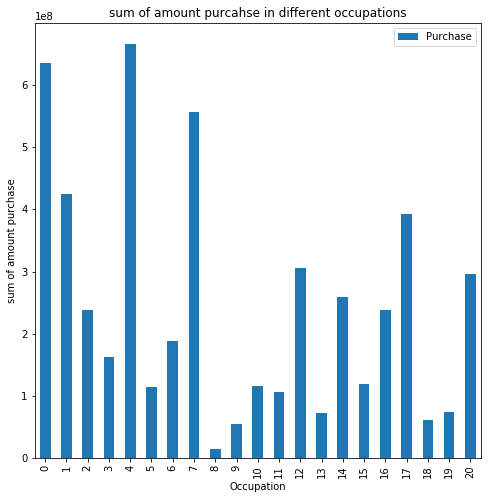

In [126]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,8

# checking the sum of  amount purchase in different occupations
df[['Occupation','Purchase']][0:550068].groupby('Occupation').sum().plot(kind ='bar')
plt.title('sum of amount purcahse in different occupations')
plt.xlabel('Occupation')
plt.ylabel('sum of amount purchase')
plt.show()

we already knew that occupation 4 and 0 is making more purchases. 

so they sum of purchase is also high in them

In [127]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

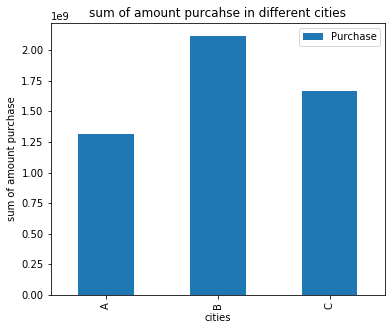

In [128]:
from pylab import rcParams
rcParams['figure.figsize'] = 6,5

# Sum of amount purchase in different cities
df[['City_Category','Purchase']][0:550068].groupby('City_Category').sum().plot(kind ='bar')
plt.title('sum of amount purcahse in different cities')
plt.xlabel('cities')
plt.ylabel('sum of amount purchase')
plt.show()

We already found that Number of sales in the city B and C are higher.

So, the sum of amount spent is also higher in two cities.

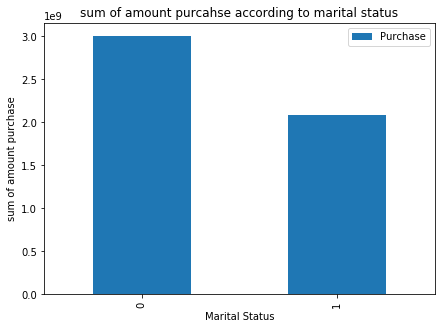

In [129]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,5

# Sum of amount purchase in different cities
df[['Marital_Status','Purchase']][0:550068].groupby('Marital_Status').sum().plot(kind ='bar')
plt.title('sum of amount purcahse according to marital status')
plt.xlabel('Marital Status')
plt.ylabel('sum of amount purchase')
plt.show()

#### we already number of purchases done by the Married are more and their sum is higher.

In [130]:
df[0:550068].describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,14.000000,8.000000,12054.000000


#### we found that product ID P00069042 is bought more.

In [131]:
df1 = pd.concat([df_train,df_test], axis = 0)

In [132]:
df1['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [133]:
245982/df1.shape[0]

0.31388587244326993

In [134]:
# product id
productId= list(df1.Product_ID.unique())

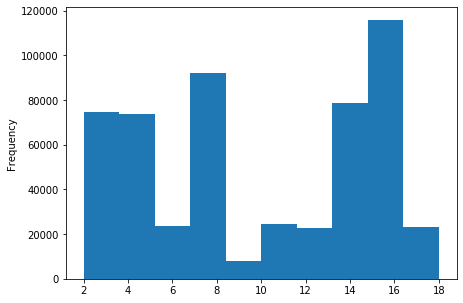

In [135]:
df1.Product_Category_2.plot(kind = 'hist')
plt.show()

In [136]:
# filling nan values with the 0 digit
df['Product_Category_2'].fillna(0, inplace = True)

In [137]:
# Filling the zero digit values with  mean of product 
df['Product_Category_2'].replace(0,10, inplace = True)

In [138]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,10.0,0.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,10.0,0.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,10.0,0.0,7969.0


In [139]:
# checking the different values
df.Gender.value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

In [140]:
# Replacing the Gender with 0 and 1
df.Gender.replace({'M':0,'F': 1}, inplace=True)

In [141]:
# checking the different age groups
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [142]:
# Replacing the Age with the Numbers

df.Age.replace({'0-17':1,'18-25': 4,'26-35':2, '36-45': 3, '46-50':5,'55+':6, '51-55': 7}, inplace=True)

In [143]:
# checking the City_Category

df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [144]:
df.City_Category.replace({'A':1, 'B':2, 'C':3}, inplace =True)

In [145]:
# checking the City_Category

df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [146]:
df.Stay_In_Current_City_Years.replace({'4+':4},inplace=True)

In [147]:
df.Gender = df.Gender.astype('object')
df.Age =  df.Age.astype('object')
df.Occupation = df.Occupation.astype('object')
df.City_Category = df.City_Category.astype('object')
df.Marital_Status = df.Marital_Status.astype('object')

In [148]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                     object
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                 object
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [149]:
# creating the since for the  categorical variables

df2 = pd.get_dummies(df[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']])

In [150]:
# dropping the duplicate columns 
df  = df.drop(['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status'], axis=1)

In [151]:
df.head()

,User_ID,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,3,10.0,0.0,8370.0
1,1000001,P00248942,1,6.0,14.0,15200.0
2,1000001,P00087842,12,10.0,0.0,1422.0
3,1000001,P00085442,12,14.0,0.0,1057.0
4,1000002,P00285442,8,10.0,0.0,7969.0


In [152]:
# merging the dummies to the dataframe

df = pd.concat([df,df2], axis=1)

In [153]:
# dropping the User id and product id
df = df.drop(['User_ID','Product_ID'],axis=1)

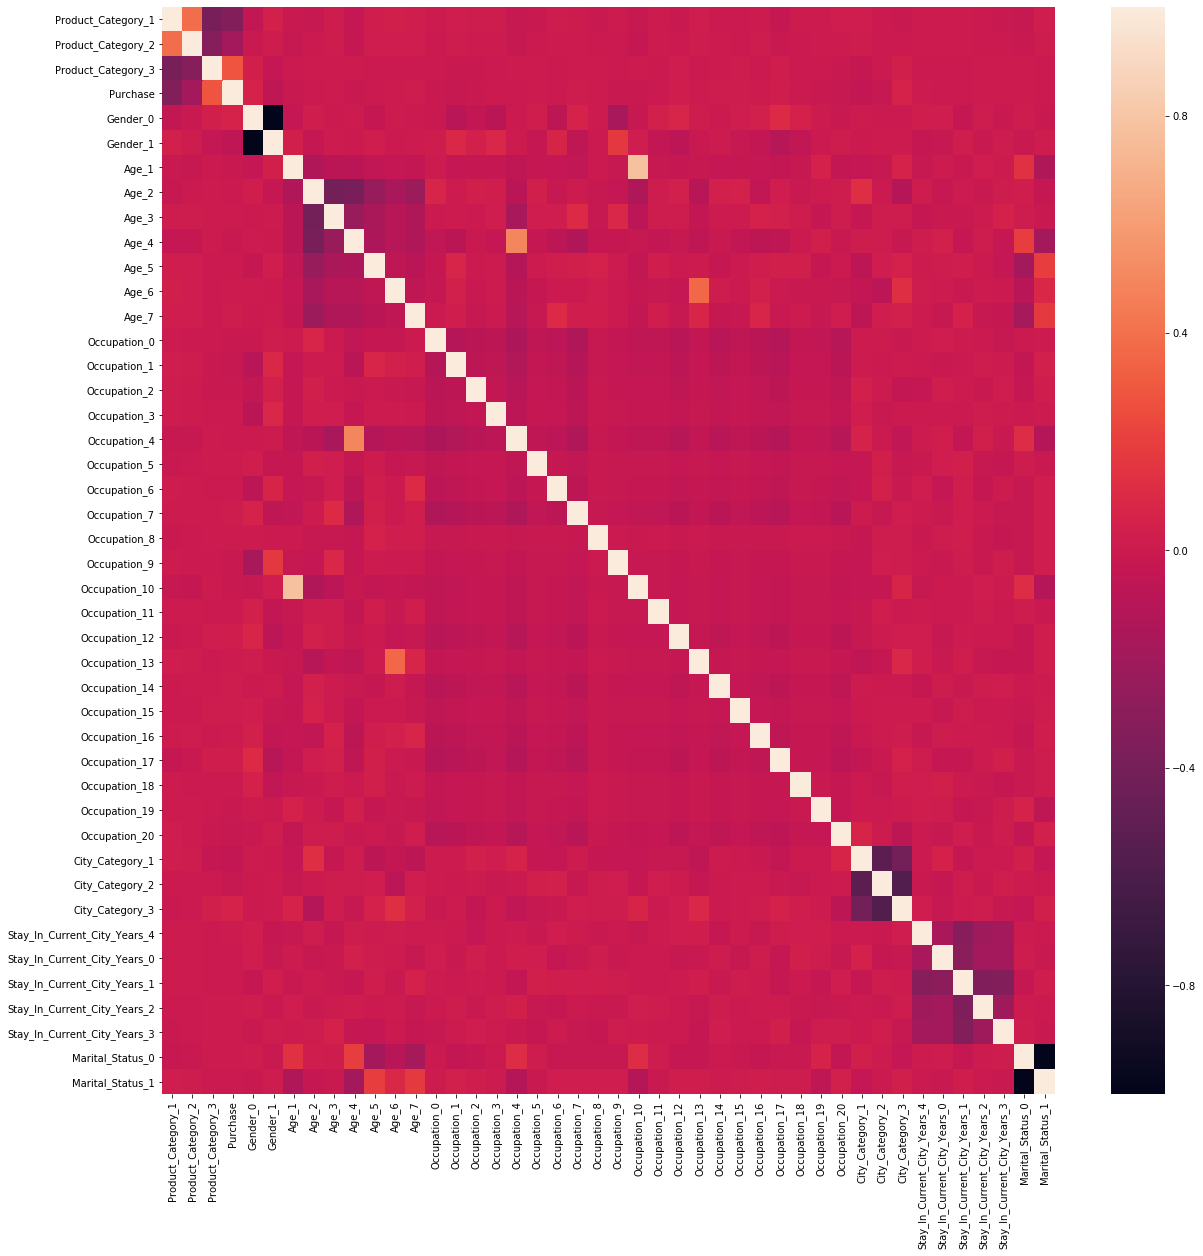

In [154]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,20

import seaborn as sns

sns.heatmap(df.corr())
plt.show()

In [155]:
# After imputing dividing the train and test data set

train = df[0:550068]
test = df[550068:]

In [156]:
train.head()

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_0,Gender_1,Age_1,Age_2,Age_3,Age_4,...,City_Category_1,City_Category_2,City_Category_3,Stay_In_Current_City_Years_4,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Marital_Status_0,Marital_Status_1
0,3,10.0,0.0,8370.0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,1,6.0,14.0,15200.0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,12,10.0,0.0,1422.0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,12,14.0,0.0,1057.0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,8,10.0,0.0,7969.0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [157]:
test.head()

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_0,Gender_1,Age_1,Age_2,Age_3,Age_4,...,City_Category_1,City_Category_2,City_Category_3,Stay_In_Current_City_Years_4,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Marital_Status_0,Marital_Status_1
0,1,11.0,0.0,NaN,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,3,5.0,0.0,NaN,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,5,14.0,0.0,NaN,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
3,4,9.0,0.0,NaN,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
4,4,5.0,12.0,NaN,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [158]:
# checking with k-cross validation which algorthim gives better results

sample = train.sample(10000).copy()

In [159]:
# resetting the index
sample.reset_index(inplace=True)

In [160]:
# dropping the index for the sample data
sample.drop(['index'], axis = 1, inplace=True)

In [161]:
# creating the x variable for the sample data
x = sample.drop('Purchase',axis=1)

In [162]:
# creating the y variable for the sample data
y = sample['Purchase']

In [163]:
from sklearn.model_selection import cross_val_score

In [164]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [165]:
RandomForestRegressor().__class__

sklearn.ensemble._forest.RandomForestRegressor

In [166]:
algorthims = [RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors = 10),LinearRegression()]

In [167]:
import numpy as np

In [77]:
for i in algorthims:
    print(i.__class__)
    score = cross_val_score(i, x, y, cv =10, scoring='r2',verbose=1 )
    print(np.mean(score))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   40.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.6131561102837753
<class 'sklearn.tree._classes.DecisionTreeRegressor'>


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.3203174141091727
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.5245104187841811
<class 'sklearn.linear_model._base.LinearRegression'>
0.14419906097766078


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished


### product category3 has lot of missing values.But we have imputed with zeros. It might be causing the variable 

In [78]:
x.Product_Category_3.value_counts()

0.0     6966
16.0     594
15.0     525
14.0     314
5.0      310
17.0     308
9.0      220
8.0      208
12.0     173
13.0     111
18.0      83
6.0       80
4.0       36
10.0      34
11.0      23
3.0       15
Name: Product_Category_3, dtype: int64

In [79]:
x = x.drop(['Product_Category_3'],axis= 1)

In [80]:
for i in algorthims:
    print(i.__class__)
    score = cross_val_score(i, x, y, cv =5, scoring='r2',verbose=1 )
    print(np.mean(score))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.5979394486660808
<class 'sklearn.tree._classes.DecisionTreeRegressor'>


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.345301817388252
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
0.51759686693066
<class 'sklearn.linear_model._base.LinearRegression'>
0.1149587970257508


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


But after Removing product we are lossing some information. we will continue with that variable .
We try imputing it with the average value. It might increase our accuracy.

In [81]:
x.head()

,Product_Category_1,Product_Category_2,Gender_0,Gender_1,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,...,City_Category_1,City_Category_2,City_Category_3,Stay_In_Current_City_Years_4,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Marital_Status_0,Marital_Status_1
0,1,8.0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,5,10.0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,5,10.0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,16,10.0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4,1,16.0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [82]:
sample = train.sample(10000).copy()
x = sample.drop('Purchase',axis=1)
mean_3 = x.Product_Category_3.mean()
mean_3

3.9266

In [83]:
# we will round take it as 4

x.Product_Category_3.replace(0,4,inplace=True)

In [84]:
x.Product_Category_3.value_counts()

4.0     6928
16.0     617
15.0     519
14.0     332
5.0      330
17.0     294
8.0      231
9.0      203
12.0     194
13.0     104
6.0       88
18.0      87
10.0      35
11.0      29
3.0        9
Name: Product_Category_3, dtype: int64

In [85]:
Missing_percent_value = 6961/10000
Missing_percent_value

0.6961

In [86]:
for i in algorthims:
    print(i.__class__)
    score = cross_val_score(i, x, y, cv =5, scoring='r2',verbose=1 )
    print(np.mean(score))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-0.15481145210891886
<class 'sklearn.tree._classes.DecisionTreeRegressor'>


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-1.0073374119882679
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
-0.10474522107972657
<class 'sklearn.linear_model._base.LinearRegression'>
-0.004078716004686811


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [87]:
Missing_percent_value = 6961/10000
Missing_percent_value

0.6961

### imputing with the average is causing the problem. Rather than increasing 'R2' value.
### As per if we have more values are missing. i will remove that column product category3 column

In [88]:
# removing the product category 3 column
x.drop(['Product_Category_3'], axis= 1, inplace=True)

In [89]:
x.reset_index(inplace=True)

In [90]:
x.shape

(10000, 43)

In [91]:
x.head()

,index,Product_Category_1,Product_Category_2,Gender_0,Gender_1,Age_1,Age_2,Age_3,Age_4,Age_5,...,City_Category_1,City_Category_2,City_Category_3,Stay_In_Current_City_Years_4,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Marital_Status_0,Marital_Status_1
0,108444,13,16.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1,98358,3,4.0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,323327,1,2.0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,336269,1,2.0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,173400,6,10.0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [92]:
x.drop(['index'],axis= 1, inplace=True)

In [93]:
sample = train.sample(10000).copy()

sample.reset_index(inplace=True)

sample.drop(['index'],inplace =True,axis=1)

In [94]:
sample.head()

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_0,Gender_1,Age_1,Age_2,Age_3,Age_4,...,City_Category_1,City_Category_2,City_Category_3,Stay_In_Current_City_Years_4,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Marital_Status_0,Marital_Status_1
0,5,10.0,0.0,6853.0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,1,11.0,0.0,11929.0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,5,8.0,0.0,5446.0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3,1,5.0,8.0,12110.0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
4,8,10.0,0.0,7962.0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1


In [95]:
x = sample.drop(['Purchase'],axis=1)
y = sample['Purchase']

In [96]:
# we will go with feature elimination techniques to increase the R2 value

import statsmodels.api as sm

x_sm = sm.add_constant(x)
param = sm.OLS(y,x_sm).fit()

In [97]:
param.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     45.76
Date:                Thu, 06 Feb 2020   Prob (F-statistic):          2.10e-305
Time:                        16:38:13   Log-Likelihood:                -98709.
No. Observations:               10000   AIC:                         1.975e+05
Df Residuals:                    9962   BIC:                         1.978e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         3954.8797     62.918     62.857      0.000    3831.547    4078.212
Product_Category_1            -308.9876     13.159    -23.481      0.000    -334.782    -283.194
Product_Category_2             -52.2838     12.285     -4.256      0.000     -76.365     -28.203
Product_Category_3             129.2240      8.300     15.570      0.000     112.955     145.493
Gender_0                      2286.1831     60.228     37.959      0.000    2168.124    2404.243
Gender_1                      1668.6966     68.330     24.421      0.000    1534.757    1802.636
Age_1                           60.2114    415.805      0.145      0.885    -754.850     875.272
Age_2                          326.3749    108.946      2.996      0.003     112.818     539.932
Age_3                          559.9408    125.234      4.471      0.000     314.456     805.425
Age_4                          444.7512    142.406      3.123      0.002     165.607     723.896
Age_5                          858.4702    163.704      5.244      0.000     537.576    1179.364
Age_6                          791.4515    234.232      3.379      0.001     332.310    1250.593
Age_7                          913.6797    176.856      5.166      0.000     567.007    1260.353
Occupation_0                   116.6994    146.667      0.796      0.426    -170.798     404.196
Occupation_1                   281.3770    174.380      1.614      0.107     -60.443     623.197
Occupation_2                   279.8403    224.267      1.248      0.212    -159.768     719.449
Occupation_3                   471.8954    262.025      1.801      0.072     -41.727     985.518
Occupation_4                   448.9485    164.896      2.723      0.006     125.719     772.178
Occupation_5                   179.3060    307.650      0.583      0.560    -423.751     782.363
Occupation_6                   272.2785    249.431      1.092      0.275    -216.657     761.214
Occupation_7                   219.9904    157.915      1.393      0.164     -89.555     529.535
Occupation_8                 -1430.0259    959.830     -1.490      0.136   -3311.486     451.434
Occupation_9                    -9.4969    437.951     -0.022      0.983    -867.968     848.975
Occupation_10                   87.5530    501.960      0.174      0.862    -896.389    1071.495
Occupation_11                  -77.8376    326.072     -0.239      0.811    -717.005     561.330
Occupation_12                  280.5893    200.365      1.400      0.161    -112.167     673.345
Occupation_13                 -136.4980    424.849     -0.321      0.748    -969.288     696.292
Occupation_14                  642.1280    215.606      2.978      0.003     219.497    1064.759
Occupation_15                 1158.4739    308.691      3.753      0.000    

After the observation.

It is showing that there is bigger p values in occupation. we cannot remove them, it is need for our analysis

In [98]:
## We know that we are duplicating the data martial status and Gender. We will remove one of them

x.drop(['Marital_Status_1','Gender_1'],axis = 1, inplace=True)

In [99]:
for i in algorthims:
    print(i.__class__)
    score = cross_val_score(i, x, y, cv =5, scoring='r2',verbose=1 )
    print(np.mean(score))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.6036277194660833
<class 'sklearn.tree._classes.DecisionTreeRegressor'>


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.3212090344702335
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
0.527121549876588
<class 'sklearn.linear_model._base.LinearRegression'>
0.13659904634658143


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


### there is No improvement 'R2' value. I  will try to improve the KNN and Random Forest Models.

In [100]:
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [101]:
sample.shape

(10000, 44)

In [102]:
params = {'max_features': [30,35,44], 'n_estimators': [100,120,130], 'max_depth' : [5,10,15], 'min_samples_leaf' :[0,10,15,20]}

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
grid = GridSearchCV(estimator = RandomForestRegressor(),param_grid = params, verbose=1,scoring = 'r2',n_jobs=-1)
grid.fit(x,y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [105]:
# best parameters for the above gridsearch
grid.best_params_

{'max_depth': 10,
 'max_features': 35,
 'min_samples_leaf': 10,
 'n_estimators': 120}

In [106]:
# best score for the above gridsearch
grid.best_score_

0.6384557478702984

In [107]:
params = {'n_estimators': [130,140,150], 'max_depth' : range(7,15)}

grid = GridSearchCV(estimator = RandomForestRegressor(),param_grid = params, verbose=1,scoring = 'r2',n_jobs=-1)
grid.fit(x,y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [108]:
grid.best_score_

0.6392471186284481

In [109]:
grid.best_params_

{'max_depth': 8, 'n_estimators': 140}

In [110]:
best_par_rf = {'max_depth': 8,'max_features': 35,'min_samples_leaf': 10,'n_estimators': 140}

In [111]:
KNeighborsRegressor()

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [112]:
knn_param = {'weights': ['uniform', 'distance'], 'n_neighbors': range(2,30), 'leaf_size': [30,40,50]}

In [113]:
gridknn = GridSearchCV(KNeighborsRegressor(), param_grid=knn_param,n_jobs=-1,verbose=1, scoring='r2')
gridknn.fit(x,y)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:  1.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'leaf_size': [30, 40, 50], 'n_neighbors': range(2, 30),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=1)

In [114]:
gridknn.best_params_

{'leaf_size': 30, 'n_neighbors': 17, 'weights': 'uniform'}

In [115]:
gridknn.best_score_

0.5334909435122797

In [116]:
# There is no Much improvement in the best 'R2' score. i will try the different imputation for the product category2

In [117]:
sample = train.sample(10000).copy()

sample.head()

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_0,Gender_1,Age_1,Age_2,Age_3,Age_4,...,City_Category_1,City_Category_2,City_Category_3,Stay_In_Current_City_Years_4,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Marital_Status_0,Marital_Status_1
311802,1,2.0,15.0,7827.0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
70140,8,10.0,0.0,10016.0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
235594,5,10.0,0.0,6933.0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
43525,8,10.0,0.0,7759.0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
493676,1,2.0,13.0,19303.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0


In [118]:
# Taking the unique Numbers in the product category_2
numbers= list(sample.Product_Category_2.unique())[1:]
numbers

[10.0,
 5.0,
 16.0,
 14.0,
 8.0,
 4.0,
 13.0,
 15.0,
 11.0,
 12.0,
 3.0,
 17.0,
 6.0,
 7.0,
 18.0,
 9.0]

In [119]:
np.random.choice(numbers,1)

array([13.])

In [120]:
# Filling the zero digit values with  mean of product 
df['Product_Category_2'].replace(10,np.random.choice(numbers), inplace = True)

In [121]:
df.Product_Category_2.value_counts()

17.0    269506
8.0      91317
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
13.0     15054
9.0       8177
12.0      7801
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

In [122]:
# taking the different samples

sample = train.sample(10000).copy()
sample.head()


,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_0,Gender_1,Age_1,Age_2,Age_3,Age_4,...,City_Category_1,City_Category_2,City_Category_3,Stay_In_Current_City_Years_4,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Marital_Status_0,Marital_Status_1
122828,5,8.0,0.0,8628.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
501107,5,15.0,0.0,5405.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
508883,1,2.0,15.0,11993.0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
527305,8,13.0,0.0,10081.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
39237,6,8.0,0.0,12023.0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [123]:
sample.reset_index(inplace=True)

sample.drop(['index'],inplace =True,axis=1)

In [124]:
sample.shape

(10000, 44)

In [125]:
x.Product_Category_2.value_counts()

10.0    3203
8.0     1175
14.0    1016
2.0      885
16.0     767
15.0     704
5.0      480
4.0      453
6.0      324
11.0     262
17.0     262
13.0     160
9.0       98
12.0      96
18.0      59
3.0       52
7.0        4
Name: Product_Category_2, dtype: int64

In [126]:
x = sample.drop(['Purchase','Product_Category_3'],axis=1)
y = sample['Purchase']

In [127]:
from sklearn.model_selection import cross_val_score

cvscore = cross_val_score(RandomForestRegressor(),x,y,cv=5, scoring='r2' )
cvscore

array([0.55422581, 0.55672342, 0.58648127, 0.56823737, 0.56919715])

In [128]:
sample.Purchase.value_counts()

7012.0     8
5241.0     8
6934.0     8
5242.0     8
7901.0     8
          ..
11963.0    1
10640.0    1
1809.0     1
3148.0     1
5284.0     1
Name: Purchase, Length: 5863, dtype: int64

In [76]:
x_final = train.drop(['Purchase', 'Product_Category_3'],axis=1)
y_final = train['Purchase']

In [130]:
x_final.head()

,Product_Category_1,Product_Category_2,Gender_0,Gender_1,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,...,City_Category_1,City_Category_2,City_Category_3,Stay_In_Current_City_Years_4,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Marital_Status_0,Marital_Status_1
0,3,17.0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,1,6.0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,12,17.0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,12,14.0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,8,17.0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0


In [131]:
x_final.Gender_0.value_counts()

1    414259
0    135809
Name: Gender_0, dtype: int64

In [132]:
# Forming the train and test split in the train data itself. To Improve the Model and checking the parameters

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_final,y_final,test_size=0.2,random_state=99)

In [133]:
# imputing the best parameters for the Random Forests
rf = RandomForestRegressor(max_depth=8,max_features=35, min_samples_leaf=10,n_estimators=140)

In [134]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features=35, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=140, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [135]:
predict = rf.predict(x_test)

In [79]:
from sklearn.metrics import r2_score,mean_absolute_error

In [137]:
r2_score(y_test,predict)

0.6450916754445242

In [138]:
# Removing the Gender column '0' and '1' in column is enough to provide the information
x_final = train.drop(['Purchase', 'Product_Category_3','Gender_0'],axis=1)

# Forming the train and test split in the train data itself. To Improve the Model and checking the parameters

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_final,y_final,test_size=0.2,random_state=99)

# imputing the best parameters for the Random Forests
rf = RandomForestRegressor(max_depth=8,max_features=35, min_samples_leaf=10,n_estimators=140)

# Fitting the model 

rf.fit(x_train,y_train)

# predicting the values
predict = rf.predict(x_test)

# checking the 'R2' score

print(r2_score(y_test,predict))

0.6442707883909231


We see small improvement in the R2 Score

In [139]:
x_final.Marital_Status_0.value_counts()

1    324731
0    225337
Name: Marital_Status_0, dtype: int64

In [140]:
# Removing the martial column

x_final = train.drop(['Purchase', 'Product_Category_3','Gender_0','Marital_Status_1'],axis=1)

# Forming the train and test split in the train data itself. To Improve the Model and checking the parameters

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_final,y_final,test_size=0.2,random_state=99)

# imputing the best parameters for the Random Forests
rf = RandomForestRegressor(max_depth=8,max_features=35, min_samples_leaf=10,n_estimators=140)

# Fitting the model 

rf.fit(x_train,y_train)

# predicting the values
predict = rf.predict(x_test)

# checking the 'R2' score

print(r2_score(y_test,predict))

0.6461959246723391


In [141]:
# taking the staying in city as integer by loading from train data again
training_data =  pd.read_csv('train_blackfriday.csv')
train_city = training_data['Stay_In_Current_City_Years']
train_city = train_city.replace({'4+':4})
x_final = pd.concat([x_final,train_city], axis=1)

In [142]:
# Removing the martial column

x_final = train.drop(['Purchase', 'Product_Category_3','Gender_0','Marital_Status_1','Stay_In_Current_City_Years_4', 'Stay_In_Current_City_Years_0','Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2','Stay_In_Current_City_Years_3'],axis=1)

# Forming the train and test split in the train data itself. To Improve the Model and checking the parameters

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_final,y_final,test_size=0.2,random_state=99)

# imputing the best parameters for the Random Forests

rf = RandomForestRegressor(max_depth=8,max_features=35, min_samples_leaf=10,n_estimators=140)

# Fitting the model 

rf.fit(x_train,y_train)

# predicting the values
predict = rf.predict(x_test)

# checking the 'R2' score

print(r2_score(y_test,predict))

0.6469453102008736


In [172]:
train.Product_Category_2.value_counts()

17.0    190001
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
13.0     10531
9.0       5693
12.0      5528
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

### Trying to impute most relevant information to the Product category_2. checking how the impact will be

In [191]:
# i will try to impute the product cargeory with most probabale values.That might improve the accuracy

prod_ct_2 =  pd.read_csv('train_blackfriday.csv')
product_cat_2= prod_ct_2['Product_Category_2']

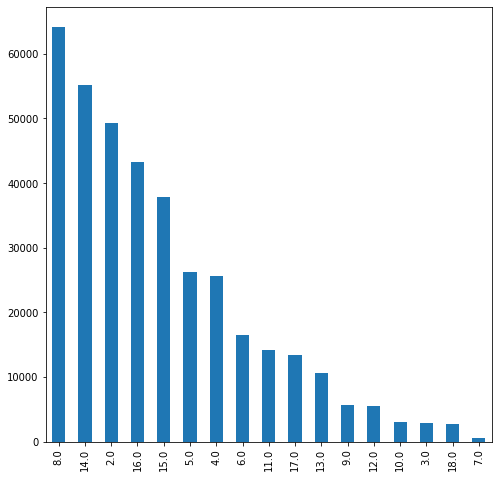

In [192]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,8
product_cat_2.value_counts().plot(kind='bar')
plt.show()

In [193]:
# filling nan values with most frequent number 8

product_cat_2.fillna(8, inplace=True)

In [194]:
# combinig the newly imputed product cat2
x_final = pd.concat([x_final,product_cat_2], axis=1)

In [195]:
product_cat_2.value_counts()

8.0     237726
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

In [183]:
x_final.head()

,Product_Category_1,Gender_1,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Occupation_0,...,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_1,City_Category_2,City_Category_3,Marital_Status_0,Product_Category_2
0,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,5.0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,6.0
2,12,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,5.0
3,12,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,14.0
4,8,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,5.0


In [200]:
x_final.Product_Category_3.replace(0,16,inplace=True)

16.0    415883
15.0     28013
14.0     18428
17.0     16702
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: Product_Category_3, dtype: int64

In [202]:
# Removing the martial column

x_final = train.drop(['Purchase','Gender_0','Marital_Status_1','Stay_In_Current_City_Years_4', 'Stay_In_Current_City_Years_0','Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2','Stay_In_Current_City_Years_3'],axis=1)

# Forming the train and test split in the train data itself. To Improve the Model and checking the parameters

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_final,y_final,test_size=0.2,random_state=99)

# imputing the best parameters for the Random Forests

rf = RandomForestRegressor(max_depth=8,max_features=35, min_samples_leaf=10,n_estimators=140)

# Fitting the model 

rf.fit(x_train,y_train)

# predicting the values
predict = rf.predict(x_test)

# checking the 'R2' score

print(r2_score(y_test,predict))

0.6537070472723396


In [81]:
# imputing the most frequent values into the product category 3

x_final.Product_Category_3.replace(0,(np.random.choice([15,14,17,5,8,9],p = [0.2,0.2,0.2,0.2,0.1,0.1]))).value_counts()

9.0     394826
16.0     32636
15.0     28013
14.0     18428
17.0     16702
5.0      16658
8.0      12562
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: Product_Category_3, dtype: int64

In [212]:
# Adding the product category3 into the xfinal and changing the test size 0.1

x_final = train.drop(['Purchase','Gender_0','Marital_Status_1','Stay_In_Current_City_Years_4', 'Stay_In_Current_City_Years_0','Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2','Stay_In_Current_City_Years_3'],axis=1)

# Forming the train and test split in the train data itself. To Improve the Model and checking the parameters

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_final,y_final,test_size=0.1,random_state=99)

# imputing the best parameters for the Random Forests

rf = RandomForestRegressor(max_depth=8,max_features=35, min_samples_leaf=10,n_estimators=140)

# Fitting the model 

rf.fit(x_train,y_train)

# predicting the values
predict = rf.predict(x_test)

# checking the 'R2' score

print(r2_score(y_test,predict))

0.6538152280410024


In [225]:
grid = GridSearchCV(estimator = RandomForestRegressor(),param_grid = {'ccp_alpha': [0.0,0.1,0.2,0.3]}, verbose=1,scoring = 'r2',n_jobs=-1)
grid.fit(x,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   27.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [227]:
grid.best_params_

{'ccp_alpha': 0.1}

In [181]:
# Adding the product category3 into the xfinal and changing the test size 0.1

x_final = train.drop(['Purchase','Gender_0','Marital_Status_1','Stay_In_Current_City_Years_4', 'Stay_In_Current_City_Years_0','Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2','Stay_In_Current_City_Years_3'],axis=1)

# Forming the train and test split in the train data itself. To Improve the Model and checking the parameters

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_final,y_final,test_size=0.1,random_state=99)

# imputing the best parameters for the Random Forests

rf = RandomForestRegressor(max_depth=8,max_features=35, min_samples_leaf=10,ccp_alpha=0.1,n_estimators=140)

# Fitting the model 

rf.fit(x_train,y_train)

# predicting the values
predict = rf.predict(x_test)

# checking the 'R2' score

print(r2_score(y_test,predict))

0.6541921817563108


With the Given Data. Traditional algorthims are failing to get good accuracy.

We Might improve the accuracy by the Deep Learning.
or 
We can improve the accuracy by getting more data or adding additional Variable observations.